# Plots for Fabry-Perot
Here are the plots for the Fabry-Perot Interferometer Poster.

We need a plot for the basic theory, how it can distinguish between two close wavelengths, and how it can be used to measure the distance between two objects.

We also need a plot for the Fabry-Perot Interferometer, which shows the interference pattern of two waves.

Finally, we need a plot for the Fourier transform, which shows how the interference pattern changes as a function of the frequency.

In [1]:
# Optimized version of the Dzhanibekov effect simulation with energy dissipation
import numpy as np
import matplotlib.pyplot as plt

# Do something to beautify the plots

%matplotlib inline

# Set formats
DARK=False
if(DARK==False):
    form='.k'
    plt.style.use(['default']) 
    fontcolor='k'
else:
    form='.w'
    plt.style.use(['dark_background'])
    fontcolor='w'


SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

params = {
    'font.family': 'serif',
    'font.size' : 16, 'axes.titlesize' : 16, 'axes.labelsize' : 16, 'axes.linewidth' : 1,
    # ticks
    'xtick.labelsize' : 16, 'ytick.labelsize' : 16, 'xtick.major.size' : 8, 'xtick.minor.size' : 4,
    'ytick.major.size' : 8, 'ytick.minor.size' : 4, 'xtick.major.width' : 1, 'xtick.minor.width' : 1,
    'ytick.major.width' : 1, 'ytick.minor.width' : 1, 'xtick.direction' : 'in', 'ytick.direction' : 'in',
    # markers
    'lines.markersize' : 4, 'lines.markeredgewidth' : 1, 'errorbar.capsize' : 5, 'lines.linewidth' : 1.5,
    #'lines.linestyle' : None, 'lines.marker' : None,
    'savefig.bbox' : 'tight', 'legend.fontsize' : 16,
    'axes.labelsize': 16, 'axes.titlesize':20, 'xtick.labelsize':16, 'ytick.labelsize':16,
    'backend': 'Agg', 'mathtext.fontset': 'dejavuserif',
    'figure.facecolor':'w',
    #pad
    'axes.labelpad':8,
    # ticks
    'xtick.major.pad': 7,   'xtick.minor.pad': 7,   
    'ytick.major.pad': 4, 'ytick.minor.pad': 4,
}
plt.rcParams.update(params)


In [2]:
# Define Constants
wavelength = 589.3E-9 # in meters, average wavelength of sodium spectrum
k = 2*np.pi/wavelength # in radians per meter, wavevector
c = 3E8 # in meters per second, speed of light
h = 2E-3 # in meters, the distance between two mirrors
theta = np.pi/180 # in radians, the angle of incidence
n = 1.5 # refractive index of the medium
R_list = [0.1, 0.3, 0.5, 0.7, 0.9] # the reflection coefficients of the mirrors
cmap = cmap = plt.cm.rainbow(np.linspace(0, 1, 5))

# Define deduced constants
delta = 2*k*n*h*np.cos(theta) # in radians, the phase shift for going two time through the medium

# Define the intensity function, R is the intensity reflection coefficients of the mirrors
def intensity_t(delta, R):
    return 1 / (1 + ((4*R*(np.sin(delta/2))**2)/((1-R)**2))) # intensity for transmitting light

def intensity_r(delta, R):
    return 1 / (1 + ((1-R)**2/(4*R*(np.sin(delta/2))**2))) # intensity for reflecting light

## Fourier space transmittance analysis

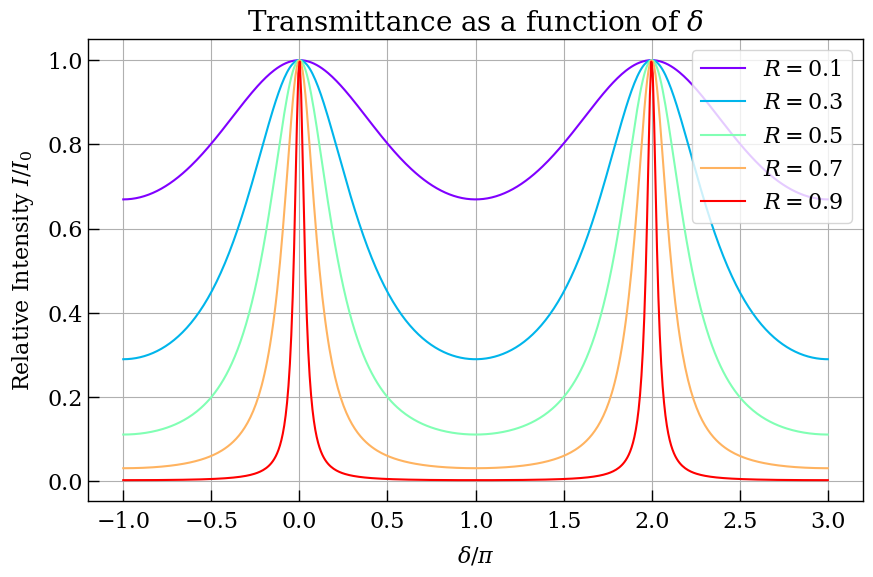

In [3]:
# Make a rough plot for intensity against delta
plt.figure(figsize=(10, 6))
for R in R_list:
    deltas = np.linspace(-1, 3, 500)
    intensities = np.zeros(500)
    for i in range(500):
        intensities[i] = intensity_t(deltas[i]*np.pi, R)
    plt.plot(deltas, intensities, label=f'$R={R}$', color = cmap[R_list.index(R)])
plt.title(f'Transmittance as a function of $\delta$')
plt.xlabel(f'$\delta/\pi$')
plt.ylabel(f'Relative Intensity $I/I_0$')
plt.legend(loc = 'upper right')
plt.grid(True)
#plt.savefig('transmittance.png')
plt.show()

## Real-space intensity plots on screen (single frequency)

In [4]:
Distance = 1 # in meters, the distance from the ethalon to the screen
Screen_size = 7 # in centimeters, the size of the screen

# define x and y on the screen
x = np.linspace(-Screen_size/2, Screen_size/2, 400)
y = np.linspace(-Screen_size/2, Screen_size/2, 400)
r = np.sqrt(x**2 + y**2) # calculate the radius of each point on the screen

# create a meshgrid of x and y
X, Y = np.meshgrid(x, y)

# calculate the theta for a coordinate (x,y)
def theta(X, Y):
    return np.arctan2(np.sqrt(X**2 + Y**2)/100, Distance)

# calculate the delta values for a coordinate (x,y)
def delta(X, Y):
    return 2*k*n*h*np.cos(theta(X,Y))

# calculate the intensity for a coordinate (x,y)
def fringe_t(X, Y):
    return intensity_t(delta(X,Y), 0.7)

def fringe_r(X, Y):
    return intensity_r(delta(X,Y), 0.7)

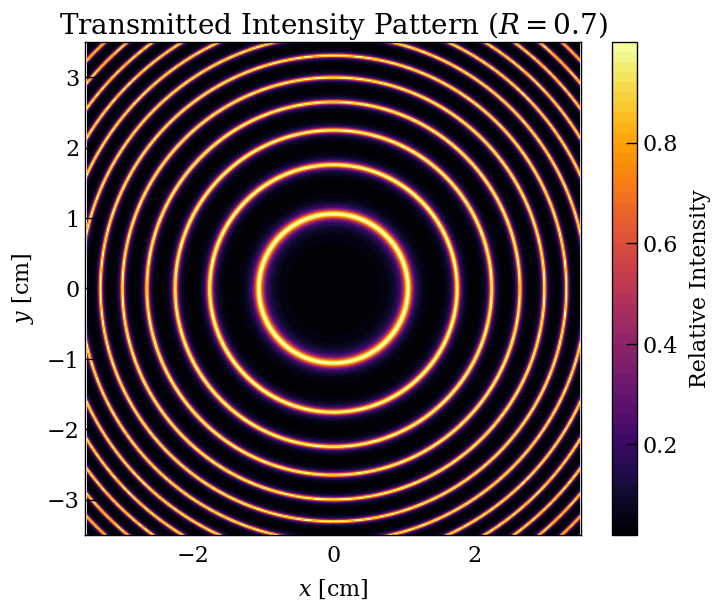

In [5]:
# make a quick sketch of the fringes on our screen using colored 2-D plots 
plt.figure(figsize=(8,6.4))
plt.title(f"Transmitted Intensity Pattern ($R=0.7$)")
plt.xlabel(f"$x$ [cm]")
plt.ylabel(f"$y$ [cm]")
plt.axis('equal')
plt.xlim(-Screen_size/2, Screen_size/2)
plt.ylim(-Screen_size/2, Screen_size/2)
contour = plt.contourf(X, Y, fringe_t(X,Y), 50, cmap = "inferno")
cbar = plt.colorbar(contour)
cbar.set_ticks([0.2, 0.4, 0.6, 0.8])  # Set ticks from 0 to 1 with a step of 0.2
cbar.set_label("Relative Intensity")
#plt.savefig('./transmitted_intensity_pattern.png', dpi=300)
plt.show()

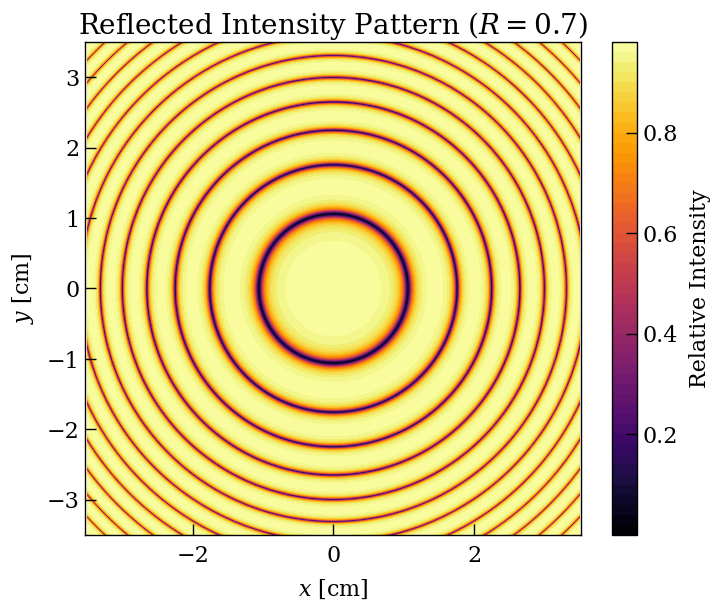

In [6]:
# make a quick sketch of the fringes on our screen using colored 2-D plots 
plt.figure(figsize=(8,6.4))
plt.title(f"Reflected Intensity Pattern ($R=0.7$)")
plt.xlabel(f"$x$ [cm]")
plt.ylabel(f"$y$ [cm]")
plt.axis('equal')
plt.xlim(-Screen_size/2, Screen_size/2)
plt.ylim(-Screen_size/2, Screen_size/2)
contour = plt.contourf(X, Y, fringe_r(X,Y), 50, cmap = "inferno")
cbar = plt.colorbar(contour)
cbar.set_ticks([0.2, 0.4, 0.6, 0.8])  # Set ticks from 0 to 1 with a step of 0.2
cbar.set_label("Relative Intensity")
#plt.savefig("reflected_intensity_pattern.png", dpi=300)
plt.show()

## Multi-frequency simulation of a Fabry-Perot cavity

In [7]:
# Intensity for multiple wavelengths
# Not our priority right now, but we can add this feature later.

## Distinguishing wavelengths